# Tensor Flow - Deep Learning

https://www.tensorflow.org/

### Theory

###### What is TensorFlow?

Developed by Google, TensorFlow (TF) is an open source framework to run machine learning, deep learning and other predictive analytics workloads

###### What is Keras?

A deep learning library that was developed to make TensorFlow easier to work with

###### Do I need to know both?

If this was pre-2017, then yes, you need to know both, but now you only need to know one

Nope, TensorFlow has intergrated Keras into it's own library so plug and play just became a whole lot easier


### What is TensorFlow / Keras trying to solve?

SciKit Learn is great, it's a really good tool that gives us variety in ways to approach predictions with our data

But it's a has huge downside...The requirement of having to tune each model separately

What if there was a way to have the Algorithm tune itself to find the best fit for the data that we have?

TensorFlow tries to solve this problem through filtering data through a Neural Network

Before we get into the Neural Network, let's first understand the basic component of the Neural Network

### Neuron

A neruon is a single function to calculate inputs and give an output

The Neuron takes in an X value

If there are multiple Neurons each neuron is assigned a W value or weight which is multiplied by the X Input value (X * W)

Now in the event that X is 0, our output would also be 0, which doesn't make for a very good neural network so a Bias, B is added to prevent a 0 outcome (X * W + B)

Taken all together based on the number of inputs we have

X1 * W1 + B

X2 * W2 + B1

...

Xn * Wn + B = Y

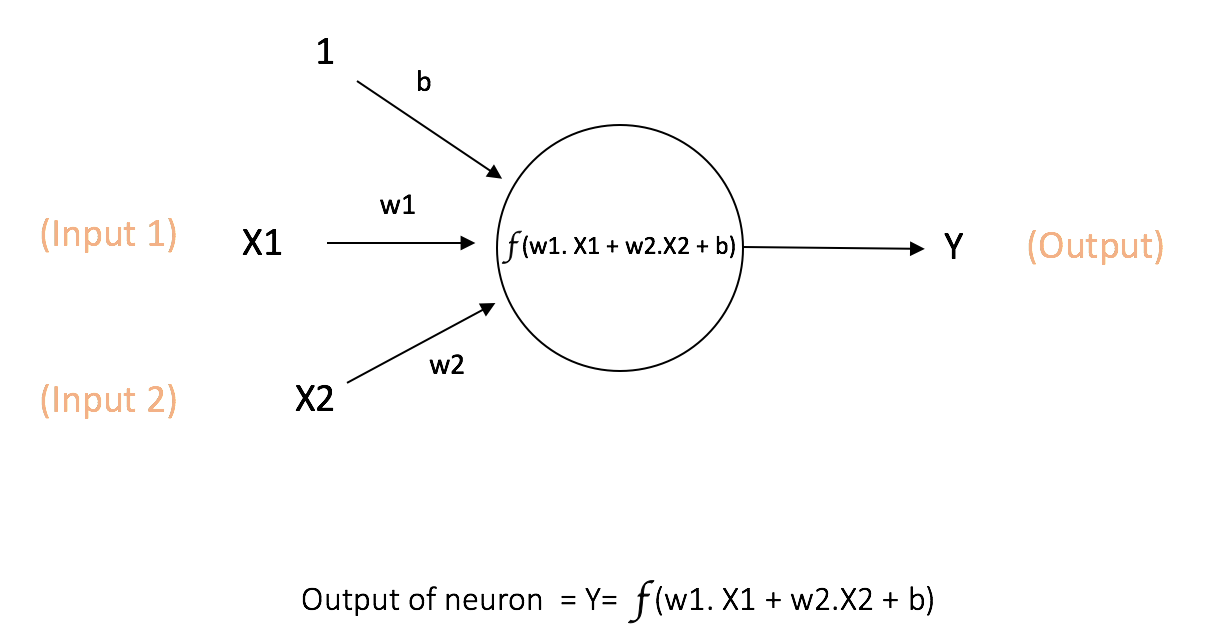


### Neural Network

Put many Neurons together and connect them up to each other and we get what is known as a neural network

Each Neural Network Vertical Line is knows as a Layer

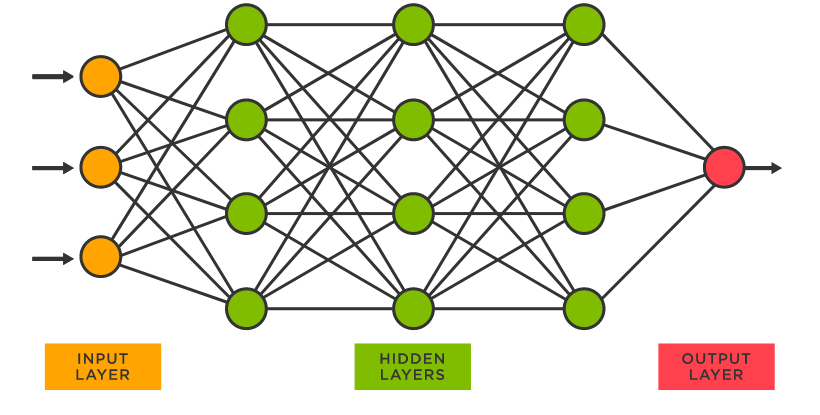


### Activation Functions

Each Neural Network Layer has what is called an Activation function

Basically a standard way to process the data coming in

Most common for beginners is the <i><b>Rectified linear unit (ReLU)</b></i>

This is the one we will be using most often


For more information on this:

https://en.wikipedia.org/wiki/Activation_function

### Propagation

The process of sending data from one layer to the next is called propagation. There are two types of propagation: forward propagation and backward propagation.

###### Forward Propagation

The data moves from input to hidden layer to output

It ends in a prediction based on the input

###### Backward Propagation

The Prediction travels backwards towards the input while tracking the error rate

The error rate is used to modify the weights and biases of each neuron, giving the neurons with a higher error rate a greater adjustment

Through re-adjustment within the hidden layers, the neural network can predict with greater accuracy the line of best fit for the data

### How Many Layers/Nodes should I have?

"Very simple. Just keep adding layers until the test error does not improve anymore." - Yoshua Bengio

###### Layers


Number of Input Layers * 2 or 3 + the number of Output Layers = Number of Layers

Simple examples

1 input and 1 output

1 input * 2 + 1 output = 3 Neural Network Layers

2 input * 2 + 1 output = 5 Neural Network Layers

###### Nodes

Tunable paramter

Start with 1 node per feature in the dataset

If the dataset is too small or has too few features, start with a default of 4 nodes x 3 layers

###### Sequential Layer

One input one Output


# Our First Tensor Flow Model - Regression Problem

### Getting Started

Import the libraries

`
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
`



## Clean, Manipulate and Prepare the data

###### Train Test Split

For TensorFlow, values are more important than dataframes

`
X = df[df.columns[1:]].values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
`

###### Scaling the data


It is important to scale the data to the X_train data set, not both

Fit to the X_train data only

Apply the X_train fit scaler to both datasets

This ensures that both datasets are normalized in the same way

`
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
` 

Check, the min for X_train should be 0.0 and the min for X_test should not be 0.0

`
X_train.min() -> 0.0
X_test.min() -> -0.014 (my dataset)
`

## Training the model


There are a few Key concepts here

Instantiation

Layers - How many Neural Networks do we want

Compilation - What algorithm type to use to train our model

### Instantiation

`
model = Sequential()
`


### Layers

How to setup each Hidden Neural Network

The number of nodes in each layer can be the number of features in our data set

Number of Input Layers * 2 or 3 + the number of Output Layers = Number of Layers

`
model.add(Dense(10,activation='relu') # (required)
model.add(Dense(10,activation='relu') # (optional)
model.add(Dense(10,activation='relu') # (optional)
model.add(Dense(1)) # Output layer (required)
`



### Compile

`optimizer` -> similar to the algorithm in SKLearn, how do we want to evaluate the data
- For regression the best choices are either `adam` or `rmsprop`
- Both are adaptive Optimzers
- For other optimizers - https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/

`loss` -> What metric are we trying to decrease in our back propagation

`model.compile(optimizer='rmsprop',  loss='mse')`


### Fit

Fit the model with the training data

`epochs` (optional) -> number of times the model will run and try to improve upon itself

`validation_data` (optional) ->  Compare against the actual data to check against overfit/underfit, not used in calcualtion however added to `model.history.history` output

`batch_size` (optional) -> Chunk down the data to test against (will go slower but hopefully provides a higer overall accuracy)


`model.fit(X_train, y_train, epochs=250, verbose=2, validation_data=(X_test, y_test), batch_size=256)`




### Pre-Prediciton Metrics

###### Loss vs Validation

Get the history of the model so that we can visualize what it did

`
model.history.history
history_df = pd.DataFrame(model.history.history)
history_df.plot()
`

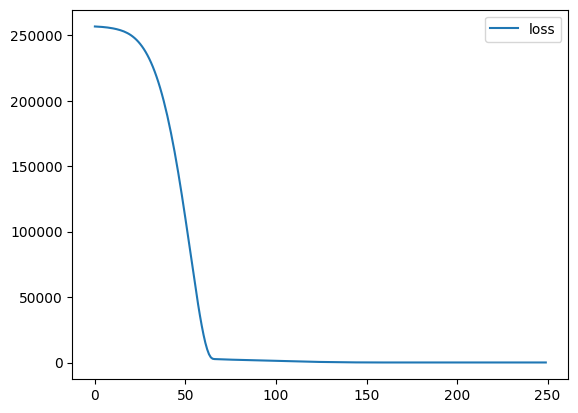


If we have added validation to the `model.fit`, then we can see the data against our testing set

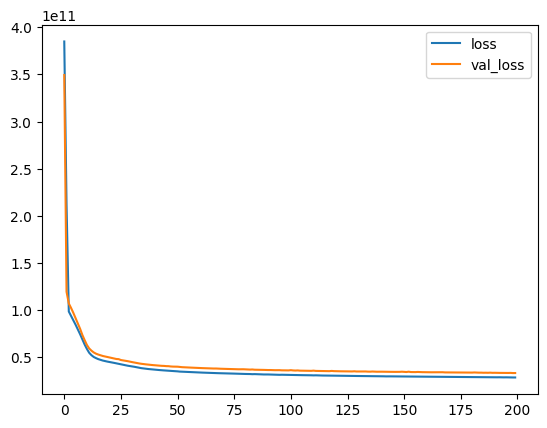

## Predictions

`test_predictions = model.predict(X_test)`


## Evaluations

We can evaluate the training data and the test data

`
model.evaluate(X_test, y_test, verbose=1)
model.evaluate(X_train, y_train, verbose=1)
`

###### Scatterplot

`plt.scatter(x=test_predictions, y=y_test)`

###### MAE and RMSE

`
mean_absolute_error(y_test, test_predictions)
np.sqrt(mean_squared_error(y_test, test_predictions))
`

###### Score

`explained_variance_score(y_test, predictions)`


In [2]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense






In [3]:
# USA Housing dataset
# https://www.kaggle.com/datasets/kanths028/usa-housing

df = pd.read_csv('USA_Housing.csv')
df.head()



,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# Train Test and Split

# With Tensorflow we really want the values, not the columns

X = df[df.columns[:-2]].values
y = df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



In [5]:
# Normalize the data with MinMaxScaler
# We want to fit the scaler to the X_train data set

scaler = MinMaxScaler()

scaler.fit(X_train)




MinMaxScaler()

In [6]:
# We want to apply the scaler to X_train and X_test

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [8]:
# Linear Regression from SKLearn so we get a baseline of what to expect

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

print('Score', lr.score(X_test, y_test))
print('RMSE', np.sqrt(mean_squared_error(y_test, pred_lr)))
print('MAE', mean_absolute_error(y_test, pred_lr))


Score 0.9146818498754016
RMSE 100341.52954485438
MAE 81135.56609336878


In [115]:
# Let's get into TensorFlow

# Model Instantiation
model = Sequential()


# Neural Network Layers with a Rectified Linear Unit Activation
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))

# Output layer
model.add(Dense(1, activation='relu'))


# Compilation layer - This will help us determine our backwards and forward propogation
model.compile(optimizer='adam', loss='mae')


In [116]:
# Fit the model

model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
110/110 [==============================] - 1s 3ms/step - loss: 1228218.5000 - val_loss: 1241061.7500
Epoch 2/500
110/110 [==============================] - 0s 3ms/step - loss: 1228201.5000 - val_loss: 1241002.6250
Epoch 3/500
110/110 [==============================] - 0s 2ms/step - loss: 1227880.5000 - val_loss: 1240105.0000
Epoch 4/500
110/110 [==============================] - 0s 2ms/step - loss: 1224935.8750 - val_loss: 1233486.7500
Epoch 5/500
110/110 [==============================] - 0s 2ms/step - loss: 1209088.5000 - val_loss: 1203067.7500
Epoch 6/500
110/110 [==============================] - 0s 2ms/step - loss: 1149112.5000 - val_loss: 1099522.0000
Epoch 7/500
110/110 [==============================] - 0s 2ms/step - loss: 965132.3750 - val_loss: 802983.6250
Epoch 8/500
110/110 [==============================] - 0s 2ms/step - loss: 519631.8125 - val_loss: 251321.3281
Epoch 9/500
110/110 [==============================] - 0s 2ms/step - loss: 224091.0938 - val_loss: 2

110/110 [==============================] - 0s 2ms/step - loss: 161361.9062 - val_loss: 153684.0781
Epoch 75/500
110/110 [==============================] - 0s 2ms/step - loss: 160126.2969 - val_loss: 152684.9375
Epoch 76/500
110/110 [==============================] - 0s 2ms/step - loss: 159104.3594 - val_loss: 151525.8281
Epoch 77/500
110/110 [==============================] - 0s 2ms/step - loss: 157682.6406 - val_loss: 150400.9531
Epoch 78/500
110/110 [==============================] - 0s 2ms/step - loss: 156526.6094 - val_loss: 149120.2500
Epoch 79/500
110/110 [==============================] - 0s 2ms/step - loss: 155266.5469 - val_loss: 147903.9375
Epoch 80/500
110/110 [==============================] - 0s 2ms/step - loss: 153970.0469 - val_loss: 146867.1719
Epoch 81/500
110/110 [==============================] - 0s 2ms/step - loss: 152701.1406 - val_loss: 145425.3281
Epoch 82/500
110/110 [==============================] - 0s 2ms/step - loss: 151439.4375 - val_loss: 144166.7812
Epoch

110/110 [==============================] - 0s 2ms/step - loss: 81647.6016 - val_loss: 81313.2891
Epoch 148/500
110/110 [==============================] - 0s 2ms/step - loss: 81736.2188 - val_loss: 81274.4297
Epoch 149/500
110/110 [==============================] - 0s 2ms/step - loss: 81607.9141 - val_loss: 81458.0156
Epoch 150/500
110/110 [==============================] - 0s 2ms/step - loss: 81668.4141 - val_loss: 81555.8594
Epoch 151/500
110/110 [==============================] - 0s 2ms/step - loss: 81661.3594 - val_loss: 81435.4062
Epoch 152/500
110/110 [==============================] - 0s 2ms/step - loss: 81712.3047 - val_loss: 81244.4766
Epoch 153/500
110/110 [==============================] - 0s 2ms/step - loss: 81680.2656 - val_loss: 81231.9922
Epoch 154/500
110/110 [==============================] - 0s 2ms/step - loss: 81759.5859 - val_loss: 81235.9375
Epoch 155/500
110/110 [==============================] - 0s 2ms/step - loss: 81593.2891 - val_loss: 81223.9922
Epoch 156/500
1

Epoch 221/500
110/110 [==============================] - 0s 2ms/step - loss: 81714.8516 - val_loss: 81325.0547
Epoch 222/500
110/110 [==============================] - 0s 2ms/step - loss: 81572.1797 - val_loss: 81168.2734
Epoch 223/500
110/110 [==============================] - 0s 2ms/step - loss: 81643.2188 - val_loss: 81530.0781
Epoch 224/500
110/110 [==============================] - 0s 2ms/step - loss: 81587.8047 - val_loss: 81144.9688
Epoch 225/500
110/110 [==============================] - 0s 2ms/step - loss: 81559.3750 - val_loss: 81257.3516
Epoch 226/500
110/110 [==============================] - 0s 2ms/step - loss: 81668.4609 - val_loss: 81142.9141
Epoch 227/500
110/110 [==============================] - 0s 2ms/step - loss: 81518.0000 - val_loss: 81177.6172
Epoch 228/500
110/110 [==============================] - 0s 2ms/step - loss: 81850.1562 - val_loss: 81159.0469
Epoch 229/500
110/110 [==============================] - 0s 2ms/step - loss: 81571.0938 - val_loss: 81287.8047
E

Epoch 295/500
110/110 [==============================] - 0s 2ms/step - loss: 81774.0625 - val_loss: 81260.7344
Epoch 296/500
110/110 [==============================] - 0s 2ms/step - loss: 81915.0078 - val_loss: 81332.3203
Epoch 297/500
110/110 [==============================] - 0s 2ms/step - loss: 81674.8828 - val_loss: 81183.0781
Epoch 298/500
110/110 [==============================] - 0s 2ms/step - loss: 81793.1719 - val_loss: 81305.5703
Epoch 299/500
110/110 [==============================] - 0s 2ms/step - loss: 81531.1250 - val_loss: 81163.8047
Epoch 300/500
110/110 [==============================] - 0s 2ms/step - loss: 81837.3828 - val_loss: 81478.9453
Epoch 301/500
110/110 [==============================] - 0s 2ms/step - loss: 81521.7500 - val_loss: 81184.3125
Epoch 302/500
110/110 [==============================] - 0s 2ms/step - loss: 81648.5469 - val_loss: 81268.2500
Epoch 303/500
110/110 [==============================] - 0s 2ms/step - loss: 81613.4844 - val_loss: 81207.5312
E

Epoch 369/500
110/110 [==============================] - 0s 2ms/step - loss: 81701.5938 - val_loss: 81239.6406
Epoch 370/500
110/110 [==============================] - 0s 2ms/step - loss: 81542.1328 - val_loss: 81169.0234
Epoch 371/500
110/110 [==============================] - 0s 2ms/step - loss: 81517.5312 - val_loss: 81273.7656
Epoch 372/500
110/110 [==============================] - 0s 2ms/step - loss: 81594.2422 - val_loss: 81433.7891
Epoch 373/500
110/110 [==============================] - 0s 2ms/step - loss: 81623.2266 - val_loss: 81345.0078
Epoch 374/500
110/110 [==============================] - 0s 2ms/step - loss: 81639.2969 - val_loss: 81497.9297
Epoch 375/500
110/110 [==============================] - 0s 2ms/step - loss: 81613.2656 - val_loss: 81185.9922
Epoch 376/500
110/110 [==============================] - 0s 2ms/step - loss: 81649.3359 - val_loss: 81481.8203
Epoch 377/500
110/110 [==============================] - 0s 2ms/step - loss: 81565.9219 - val_loss: 81500.7969
E

Epoch 443/500
110/110 [==============================] - 0s 2ms/step - loss: 81577.8047 - val_loss: 81257.9609
Epoch 444/500
110/110 [==============================] - 0s 2ms/step - loss: 81745.8203 - val_loss: 81263.2188
Epoch 445/500
110/110 [==============================] - 0s 2ms/step - loss: 81532.6641 - val_loss: 81255.2656
Epoch 446/500
110/110 [==============================] - 0s 2ms/step - loss: 81890.7812 - val_loss: 81248.2578
Epoch 447/500
110/110 [==============================] - 0s 2ms/step - loss: 81687.3516 - val_loss: 81145.4844
Epoch 448/500
110/110 [==============================] - 0s 2ms/step - loss: 81595.8281 - val_loss: 81293.9375
Epoch 449/500
110/110 [==============================] - 0s 2ms/step - loss: 81622.6641 - val_loss: 81187.3906
Epoch 450/500
110/110 [==============================] - 0s 2ms/step - loss: 81611.1641 - val_loss: 81263.3672
Epoch 451/500
110/110 [==============================] - 0s 2ms/step - loss: 81545.5547 - val_loss: 81146.8984
E

In [117]:
model.history.history

{'loss': [1228218.5,
  1228201.5,
  1227880.5,
  1224935.875,
  1209088.5,
  1149112.5,
  965132.375,
  519631.8125,
  224091.09375,
  220486.1875,
  219464.1875,
  218311.71875,
  217279.34375,
  216296.984375,
  215296.390625,
  214146.46875,
  213291.734375,
  212220.421875,
  211243.203125,
  210319.390625,
  209282.6875,
  208300.359375,
  207405.203125,
  206350.203125,
  205445.671875,
  204679.3125,
  203693.234375,
  202817.9375,
  201870.09375,
  201275.703125,
  200203.609375,
  199502.375,
  198427.59375,
  197548.78125,
  196854.375,
  195872.765625,
  195021.234375,
  194231.765625,
  193433.140625,
  192894.34375,
  191772.234375,
  190976.21875,
  190155.890625,
  189273.8125,
  188370.046875,
  187890.0,
  186980.5,
  186069.4375,
  185079.1875,
  184497.6875,
  183648.515625,
  182863.78125,
  181758.90625,
  181274.921875,
  180271.421875,
  179287.34375,
  178459.046875,
  177658.78125,
  176618.4375,
  175802.34375,
  175029.9375,
  173936.796875,
  172888.078125,


In [118]:
# Create a losses dataframe to compare our model with the actual results

losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 864x432 with 0 Axes>

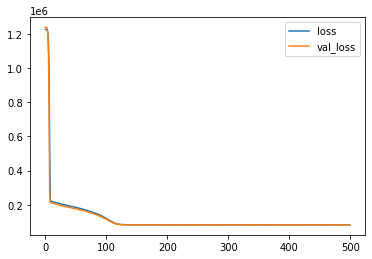

In [120]:
plt.figure(figsize=(12,6))
losses.plot()

In [121]:
losses

,loss,val_loss
0,1.228218e+06,1.241062e+06
1,1.228202e+06,1.241003e+06
2,1.227880e+06,1.240105e+06
3,1.224936e+06,1.233487e+06
4,1.209088e+06,1.203068e+06
...,...,...
495,8.164403e+04,8.122026e+04
496,8.149935e+04,8.205958e+04
497,8.164499e+04,8.114251e+04
498,8.164630e+04,8.114337e+04


In [122]:
pred_tf = model.predict(X_test)

47/47 [==============================] - 0s 926us/step


In [123]:
pred_tf

array([[1308344.6],
       [1237673.4],
       [1249626.4],
       ...,
       [1460093.5],
       [1479436.5],
       [1053469.6]], dtype=float32)

In [124]:
print('Score', explained_variance_score(y_test, pred_tf))
print('RMSE', np.sqrt(mean_squared_error(y_test, pred_tf)))
print('MAE', mean_absolute_error(y_test, pred_tf))

Score 0.914733863412253
RMSE 100330.28568721654
MAE 81143.54851204297
